hello
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 150...
Mean value of sigma: 0.567674
P created!
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 0.183797
P created!


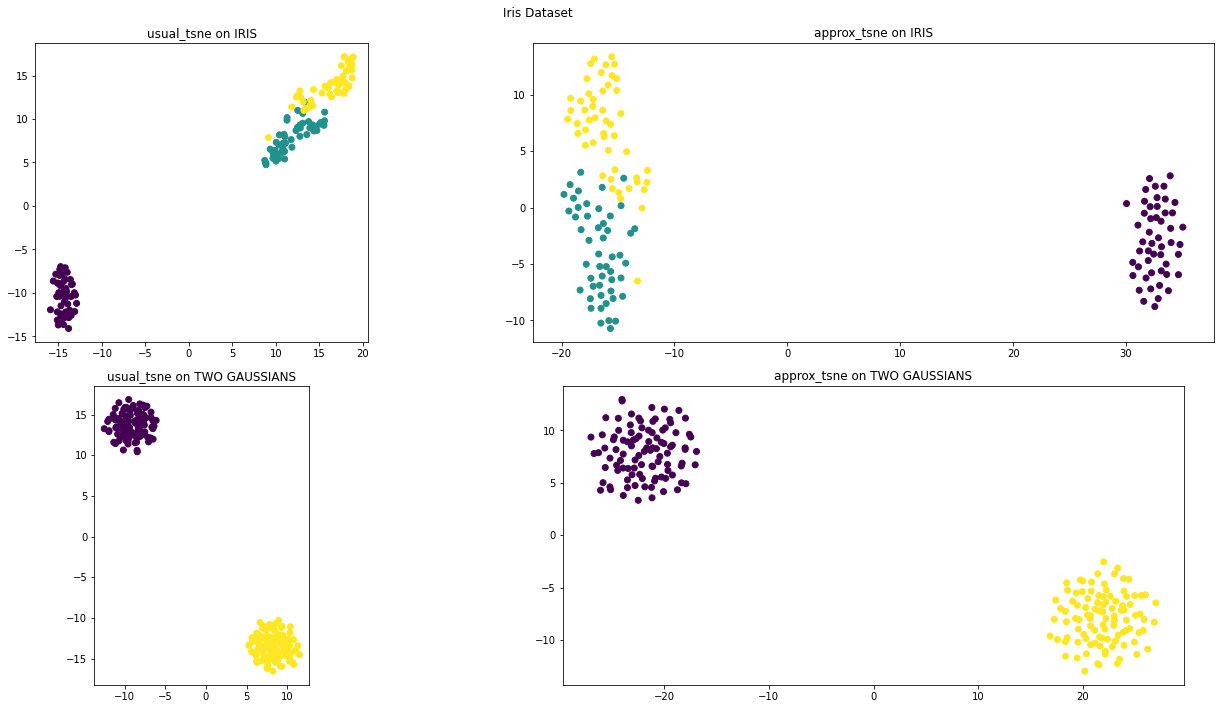

In [14]:
from Functions import *
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer, load_boston, fetch_20newsgroups, fetch_lfw_people,fetch_openml,fetch_california_housing
import math
import numpy as np
from sklearn.manifold import TSNE

# Load Iris dataset

X_gauss,y_gauss = randomGaussians2(d=30, nper=100, scaling=0.4)

X_iris = load_iris().data
y_iris = load_iris().target

X_digits= load_digits().data[-500:]
y_digits = load_digits().target[-500:]

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')
X, y_news = newsgroups.data, newsgroups.target
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 30) # m
X_news = vectorizer.fit_transform(X).toarray()

datasets = [ [X_iris,y_iris, 'IRIS'], [X_gauss,y_gauss,'TWO GAUSSIANS']]#, [X_digits,y_digits, 'DIGITS'] ]
#[X_news,y_news, 'NEWS'] 




fig, axs = plt.subplots(len(datasets), 2,figsize=(20,10))

for i in range(len(datasets)):

    X = datasets[i][0]
    y = datasets[i][1]
    name = datasets[i][2]

    #Y_normal, loss_curve, radius_curve, Z_curve, P= tsne(X, no_dims=2, max_iter=1000, simple_grad=False, ALT=False)
    
    tsne = TSNE(n_components=2, random_state=42)
    Y_normal = tsne.fit_transform(X)
    Z = get_Q_denom(Y_normal)
    Y_alt, loss_curve, radius_curve, Z_curve,P= tsne_scratch(X, no_dims=2, max_iter=1000, simple_grad=False, ALT=True, ZZ=Z)

    fig.suptitle('Iris Dataset')

    axs[i,0].set_title('usual_tsne on ' + name)
    axs[i,0].scatter(Y_normal[:,0],Y_normal[:,1],c=y)
    axs[i,0].set_aspect('equal')
    axs[i,1].set_title('approx_tsne on ' + name)
    axs[i,1].scatter(Y_alt[:,0],Y_alt[:,1],c=y)
    axs[i,1].set_aspect('equal')

plt.tight_layout()
plt.savefig('visuals/approx_tsne.png')
#standard_plot(Y, P, loss_curve, radius_curve,dim=2,partition=y)

hello
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 0.241006
P created!
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 0.241006
P created!


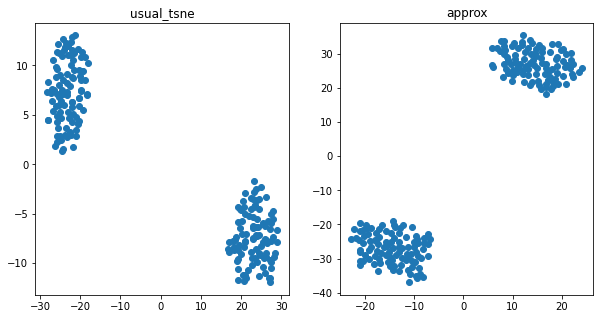

In [10]:
X,y = randomGaussians2(d=5, nper=100, scaling=0.4)

fig, axs = plt.subplots(1, 2, figsize=(10,5))

Y_normal, loss_curve, radius_curve, Z_curve, P= tsne(X, no_dims=2, max_iter=1000, simple_grad=False, ALT=False)
Z = get_Q_denom(Y_normal)
Y_alt, loss_curve, radius_curve, Z_curve, P= tsne(X, no_dims=2, max_iter=1000, simple_grad=False, ALT=True, ZZ=Z)


axs[0].set_title('usual_tsne')
axs[0].scatter(Y_normal[:,0],Y_normal[:,1])
axs[1].set_title('approx')
axs[1].scatter(Y_alt[:,0],Y_alt[:,1])